<a href="https://colab.research.google.com/github/orinizri/ML_AI_colab_notebooks/blob/main/Classsifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip3 install torch
# !pip3 install torchvision

In [ ]:
import torch
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
transform = transforms.Compose([transforms.Resize((28,28)), transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,)) ])
training_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
validation_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 12429207.42it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 329936.06it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 3152277.25it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 3891834.27it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
def image_convert(tensor):
    # Clone the tensor and detach it from the computation graph to avoid affecting gradients
    image = tensor.clone().detach().numpy()
    # Transpose from (C, H, W) to (H, W, C) to match standard image format
    image = image.transpose(1, 2, 0)
    # Denormalize the image (assuming it was normalized with mean=0.5 and std=0.5)
    image = image * np.array((0.5, 0.5, 0.5)) + np.array((0.5, 0.5, 0.5))
    # Clip values to ensure they're between 0 and 1, as required for images
    image = np.clip(image, 0, 1)
    return image


In [ ]:
training_loader = torch.utils.data.DataLoader(dataset=training_dataset, batch_size=100, shuffle=True)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=100, shuffle=False)

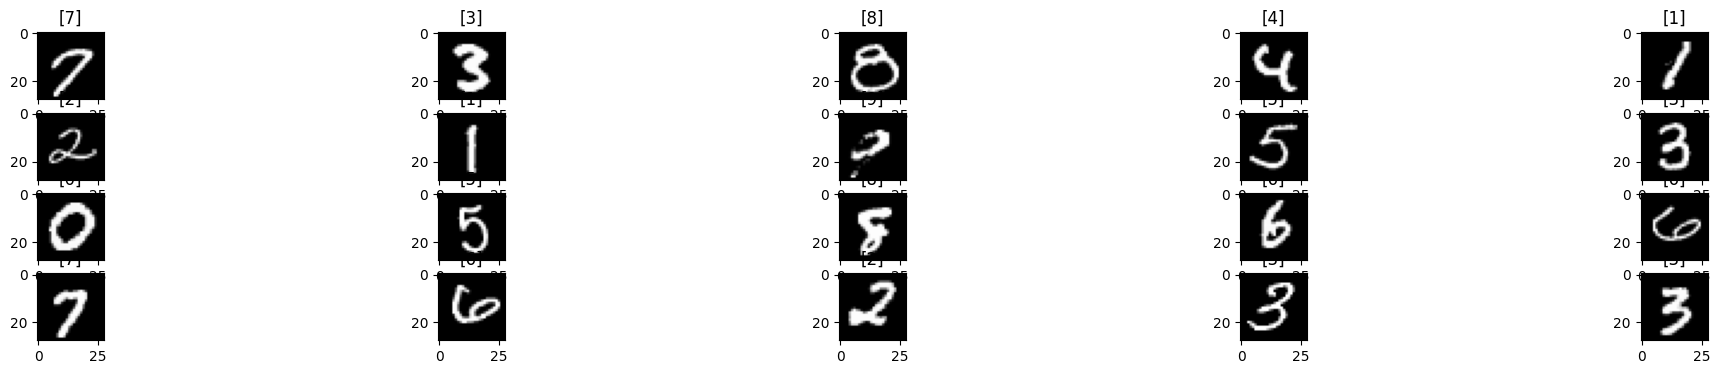

In [ ]:
data_iterator = iter(training_loader)
images, labels = next(data_iterator)
fig = plt.figure(figsize=(25,4))

for i in np.arange(20):
  ax = fig.add_subplot(4, 5, i + 1)
  plt.imshow(image_convert(images[i]))
  ax.set_title([labels[i].item()])


In [ ]:
class Classsifier(nn.Module):
  def __init__(self, D_in, H1, H2, D_out):
    super().__init__()
    self.linear1 = nn.Linear(D_in, H1)
    self.linear2 = nn.Linear(H1, H2)
    self.linear3 = nn.Linear(H2, D_out)

  def forward(self, x):
    x = F.relu(self.linear1(x))
    x = F.relu(self.linear2(x))
    x = self.linear3(x)
    return x

In [ ]:
model = Classsifier(784, 125, 65, 10)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
epochs = 12
running_loss_history = []
running_corrects_history = []
val_running_loss_history = []
val_running_corrects_history = []
for e in range(epochs):
  running_loss = 0.0
  running_corrects = 0.0
  val_running_loss = 0.0
  val_running_corrects = 0.0

  for inputs, labels in training_loader:
    inputs = inputs.view(inputs.shape[0], -1)
    outputs = model(inputs)
    loss = criterion(outputs, labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    _, preds = torch.max(outputs, 1)
    running_loss += loss.item()
    running_corrects += torch.sum(preds == labels.data)
  else:
    with torch.no_grad():
      for val_inputs, val_labels in validation_loader:
          val_inputs = inputs.view(val_inputs.shape[0], -1)
          val_outputs = model(val_inputs)
          val_loss = criterion(val_outputs, labels)
          _, val_preds = torch.max(outputs, 1)
          val_running_loss += val_loss.item()
          val_running_corrects += torch.sum(val_preds == labels.data)



    epoch_loss = running_loss / len(training_loader)
    epoch_acc = running_corrects.float() / len(training_loader)
    running_loss_history.append(epoch_loss)
    running_corrects_history.append(epoch_acc)
    val_epoch_loss = val_running_loss / len(validation_loader)
    val_epoch_acc = val_running_corrects.float() / len(validation_loader)
    val_running_loss_history.append(val_epoch_loss)
    val_running_corrects_history.append(val_epoch_acc)
    print('epoch:', e + 1)
    print('training loss: {:.4f}, accuracy: {:.4f}'.format(epoch_loss, epoch_acc.item()))
    print('validation loss: {:.4f}, accuracy: {:.4f}'.format(val_epoch_loss, val_epoch_acc.item()))


epoch: 1
training loss: 0.4340, accuracy: 87.2933
validation loss: 0.2618, accuracy: 91.0000
epoch: 2
training loss: 0.2062, accuracy: 93.8383
validation loss: 0.1099, accuracy: 95.0000
epoch: 3
training loss: 0.1484, accuracy: 95.3967
validation loss: 0.0738, accuracy: 97.0000
epoch: 4
training loss: 0.1178, accuracy: 96.3450
validation loss: 0.1740, accuracy: 95.0000
epoch: 5
training loss: 0.0977, accuracy: 96.9683
validation loss: 0.0894, accuracy: 98.0000
epoch: 6
training loss: 0.0857, accuracy: 97.2867
validation loss: 0.0242, accuracy: 99.0000
epoch: 7
training loss: 0.0762, accuracy: 97.6133
validation loss: 0.0304, accuracy: 99.0000
epoch: 8
training loss: 0.0690, accuracy: 97.7567
validation loss: 0.0324, accuracy: 97.0000
epoch: 9
training loss: 0.0623, accuracy: 97.9817
validation loss: 0.0425, accuracy: 98.0000
epoch: 10
training loss: 0.0554, accuracy: 98.2083
validation loss: 0.0497, accuracy: 98.0000
epoch: 11
training loss: 0.0533, accuracy: 98.2433
validation loss: 0

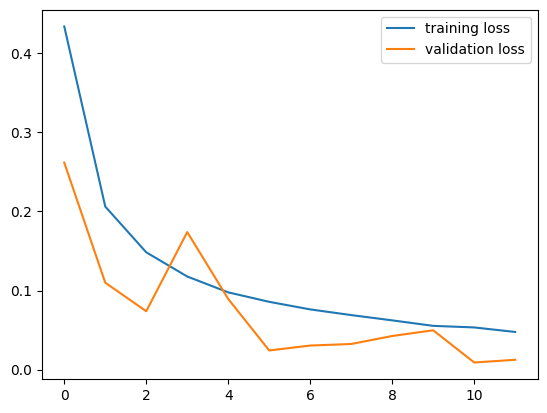

In [ ]:
plt.plot(running_loss_history, label='training loss')
plt.plot(val_running_loss_history, label='validation loss')
plt.legend()

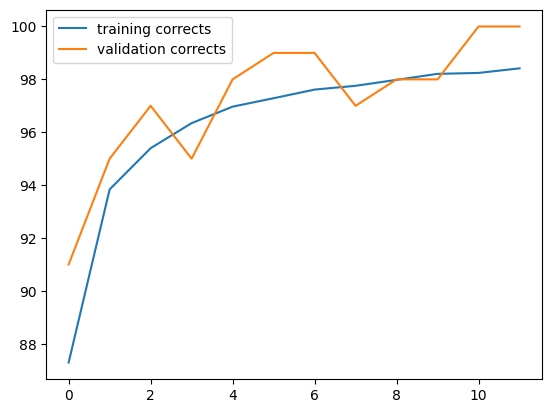

In [ ]:
plt.plot(running_corrects_history, label='training corrects')
plt.plot(val_running_corrects_history, label='validation corrects')
plt.legend()

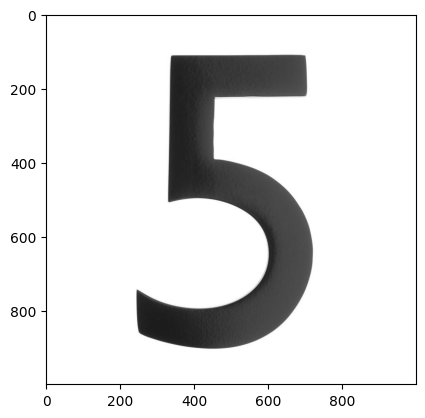

In [ ]:
import requests
from PIL import Image
import PIL

url = 'https://images.homedepot-static.com/productImages/007164ea-d47e-4f66-8d8c-fd9f621984a2/svn/architectural-mailboxes-house-letters-numbers-3585b-5-64_1000.jpg'
response = requests.get(url, stream = True)
img = Image.open(response.raw)
plt.imshow(img)

In [ ]:
# !pip install pillow==4.0.0

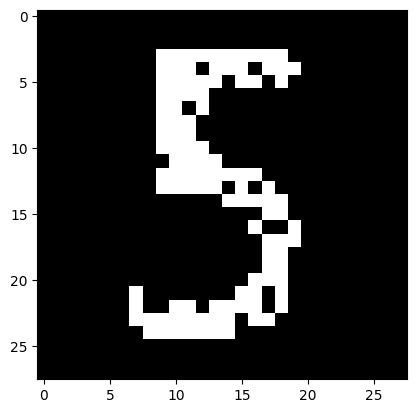

In [ ]:
# Preprocess black background and white number
img = PIL.ImageOps.invert(img)
# black and white
img = img.convert('1')
img = transform(img)
plt.imshow(image_convert(img))

In [ ]:
input = img.view(img.shape[0], -1)
output = model(input)
_, pred = torch.max(output, 1)
pred.item()

5

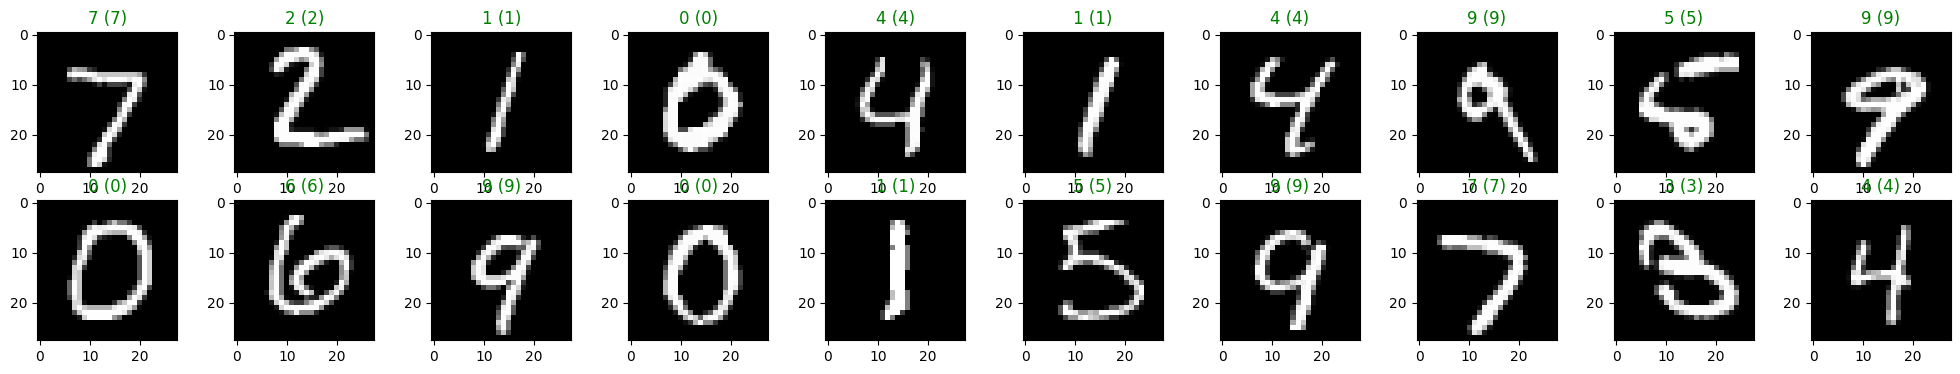

In [ ]:
data_iterator = iter(validation_loader)
images, labels = next(data_iterator)
fig = plt.figure(figsize=(25,4))
images_ = images.view(images.shape[0], -1)
outputs = model(images_)
_, preds = torch.max(outputs, 1)
for i in np.arange(20):
  ax = fig.add_subplot(2, 10, i + 1)
  plt.imshow(image_convert(images[i]))
  ax.set_title('{} ({})'.format(str(preds[i].item()), str(labels[i].item())), color=("green" if preds[i] == labels[i] else "red"))